# Project On Red wine Quality Dataset

Red Wine quality classification Model The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones). Content For more information, read [Cortez et al., 2009]. Input variables (based on physicochemical tests): 1 - fixed acidity 2 - volatile acidity 3 - citric acid 4 - residual sugar 5 - chlorides 6 - free sulfur dioxide 7 - total sulfur dioxide 8 - density 9 - pH 10 - sulphates 11 - alcohol Output variable (based on sensory data): 12 - quality (score between 0 and 10) What might be an interesting thing to do, is aside from using regression modelling, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 5 or higher getting classified as 'good/1' and the remainder as 'not good/0'. This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value. 

# Importing The Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
Importing the data

In [2]:
data=pd.read_csv('winequality-red.csv',sep=';')
data.head(100)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.7,0.600,0.17,2.3,0.058,17.0,106.0,0.9932,3.85,0.60,12.9,6
96,6.8,0.775,0.00,3.0,0.102,8.0,23.0,0.9965,3.45,0.56,10.7,5
97,7.0,0.500,0.25,2.0,0.070,3.0,22.0,0.9963,3.25,0.63,9.2,5
98,7.6,0.900,0.06,2.5,0.079,5.0,10.0,0.9967,3.39,0.56,9.8,5


# Null Value Analysis

In [3]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
#replacing 0 with mean instead of dropping the rows for citric acid
data['citric acid']=data['citric acid'].mask(data['citric acid']==0,data['citric acid'].mean())

Partioning the quality , if quality is > 5 then it should be classified as 1 else 0

In [4]:
def partition(x):
    if x  <= 5:
        return 0
    return 1
#changing data  with quality  less than 7 to be 0 ,else 1
actualScore = data['quality']
ZeroOne = actualScore.map(partition) 
data['quality'] = ZeroOne
print("Number of data points in our data", data.shape)
data.head(200)

Number of data points in our data (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,7.8,0.590,0.33,2.0,0.074,24.0,120.0,0.9968,3.25,0.54,9.4,0
196,7.3,0.580,0.30,2.4,0.074,15.0,55.0,0.9968,3.46,0.59,10.2,0
197,11.5,0.300,0.60,2.0,0.067,12.0,27.0,0.9981,3.11,0.97,10.1,1
198,5.4,0.835,0.08,1.2,0.046,13.0,93.0,0.9924,3.57,0.85,13.0,1


Exploring The Dataset

In [5]:
data.quality.value_counts()

1    855
0    744
Name: quality, dtype: int64

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [10]:
data.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.270976,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.270976,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.040000,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0


In [11]:
data.shape

(1599, 12)

# Data Visualisation using plots

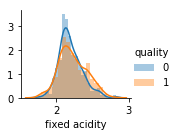

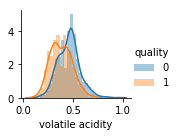

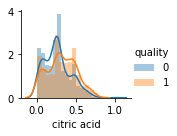

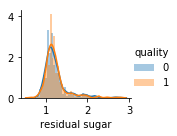

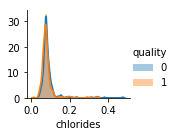

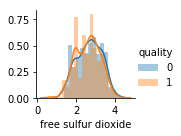

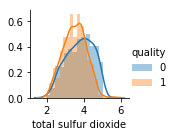

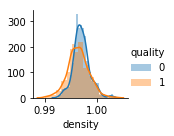

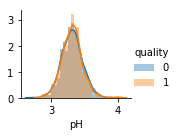

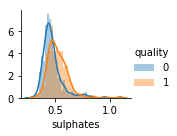

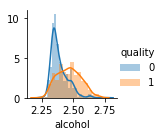

In [74]:
import warnings
warnings.filterwarnings("ignore")
columns=data.columns[:-1]
for val in columns:
#Plotting Probablity Density Function Curve for the age : -
    sns.FacetGrid(data,hue="quality",size=2)\
    .map(sns.distplot,val)\
    .add_legend();
plt.show();

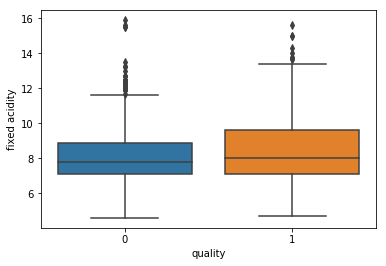

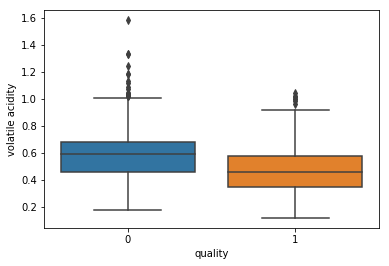

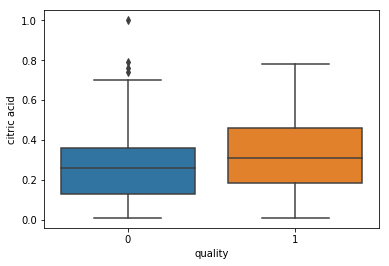

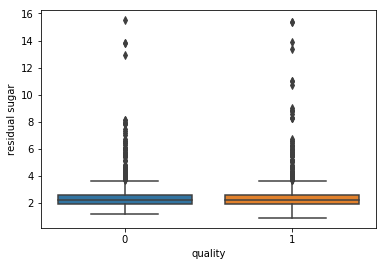

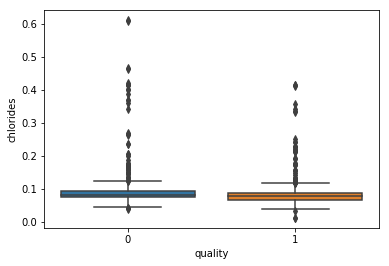

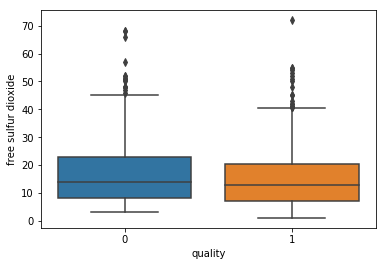

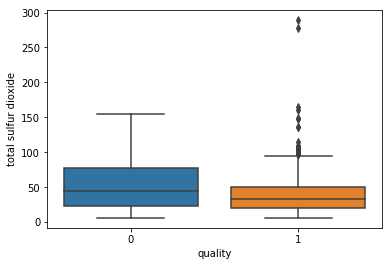

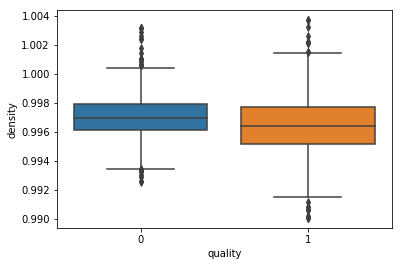

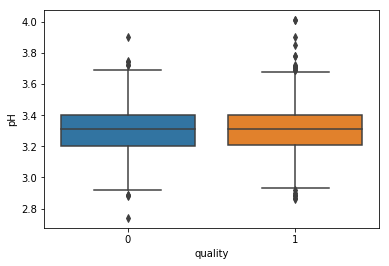

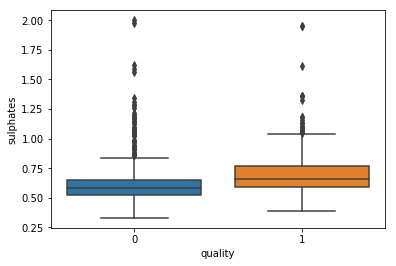

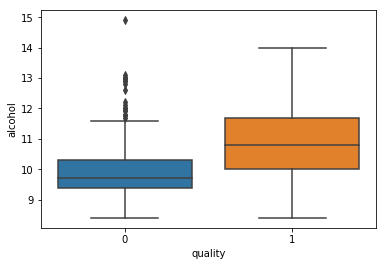

In [13]:
import warnings
warnings.filterwarnings("ignore")
columns=data.columns[:-1]
for val in columns:
    sns.boxplot(x='quality',y=val,data=data)
    plt.show()

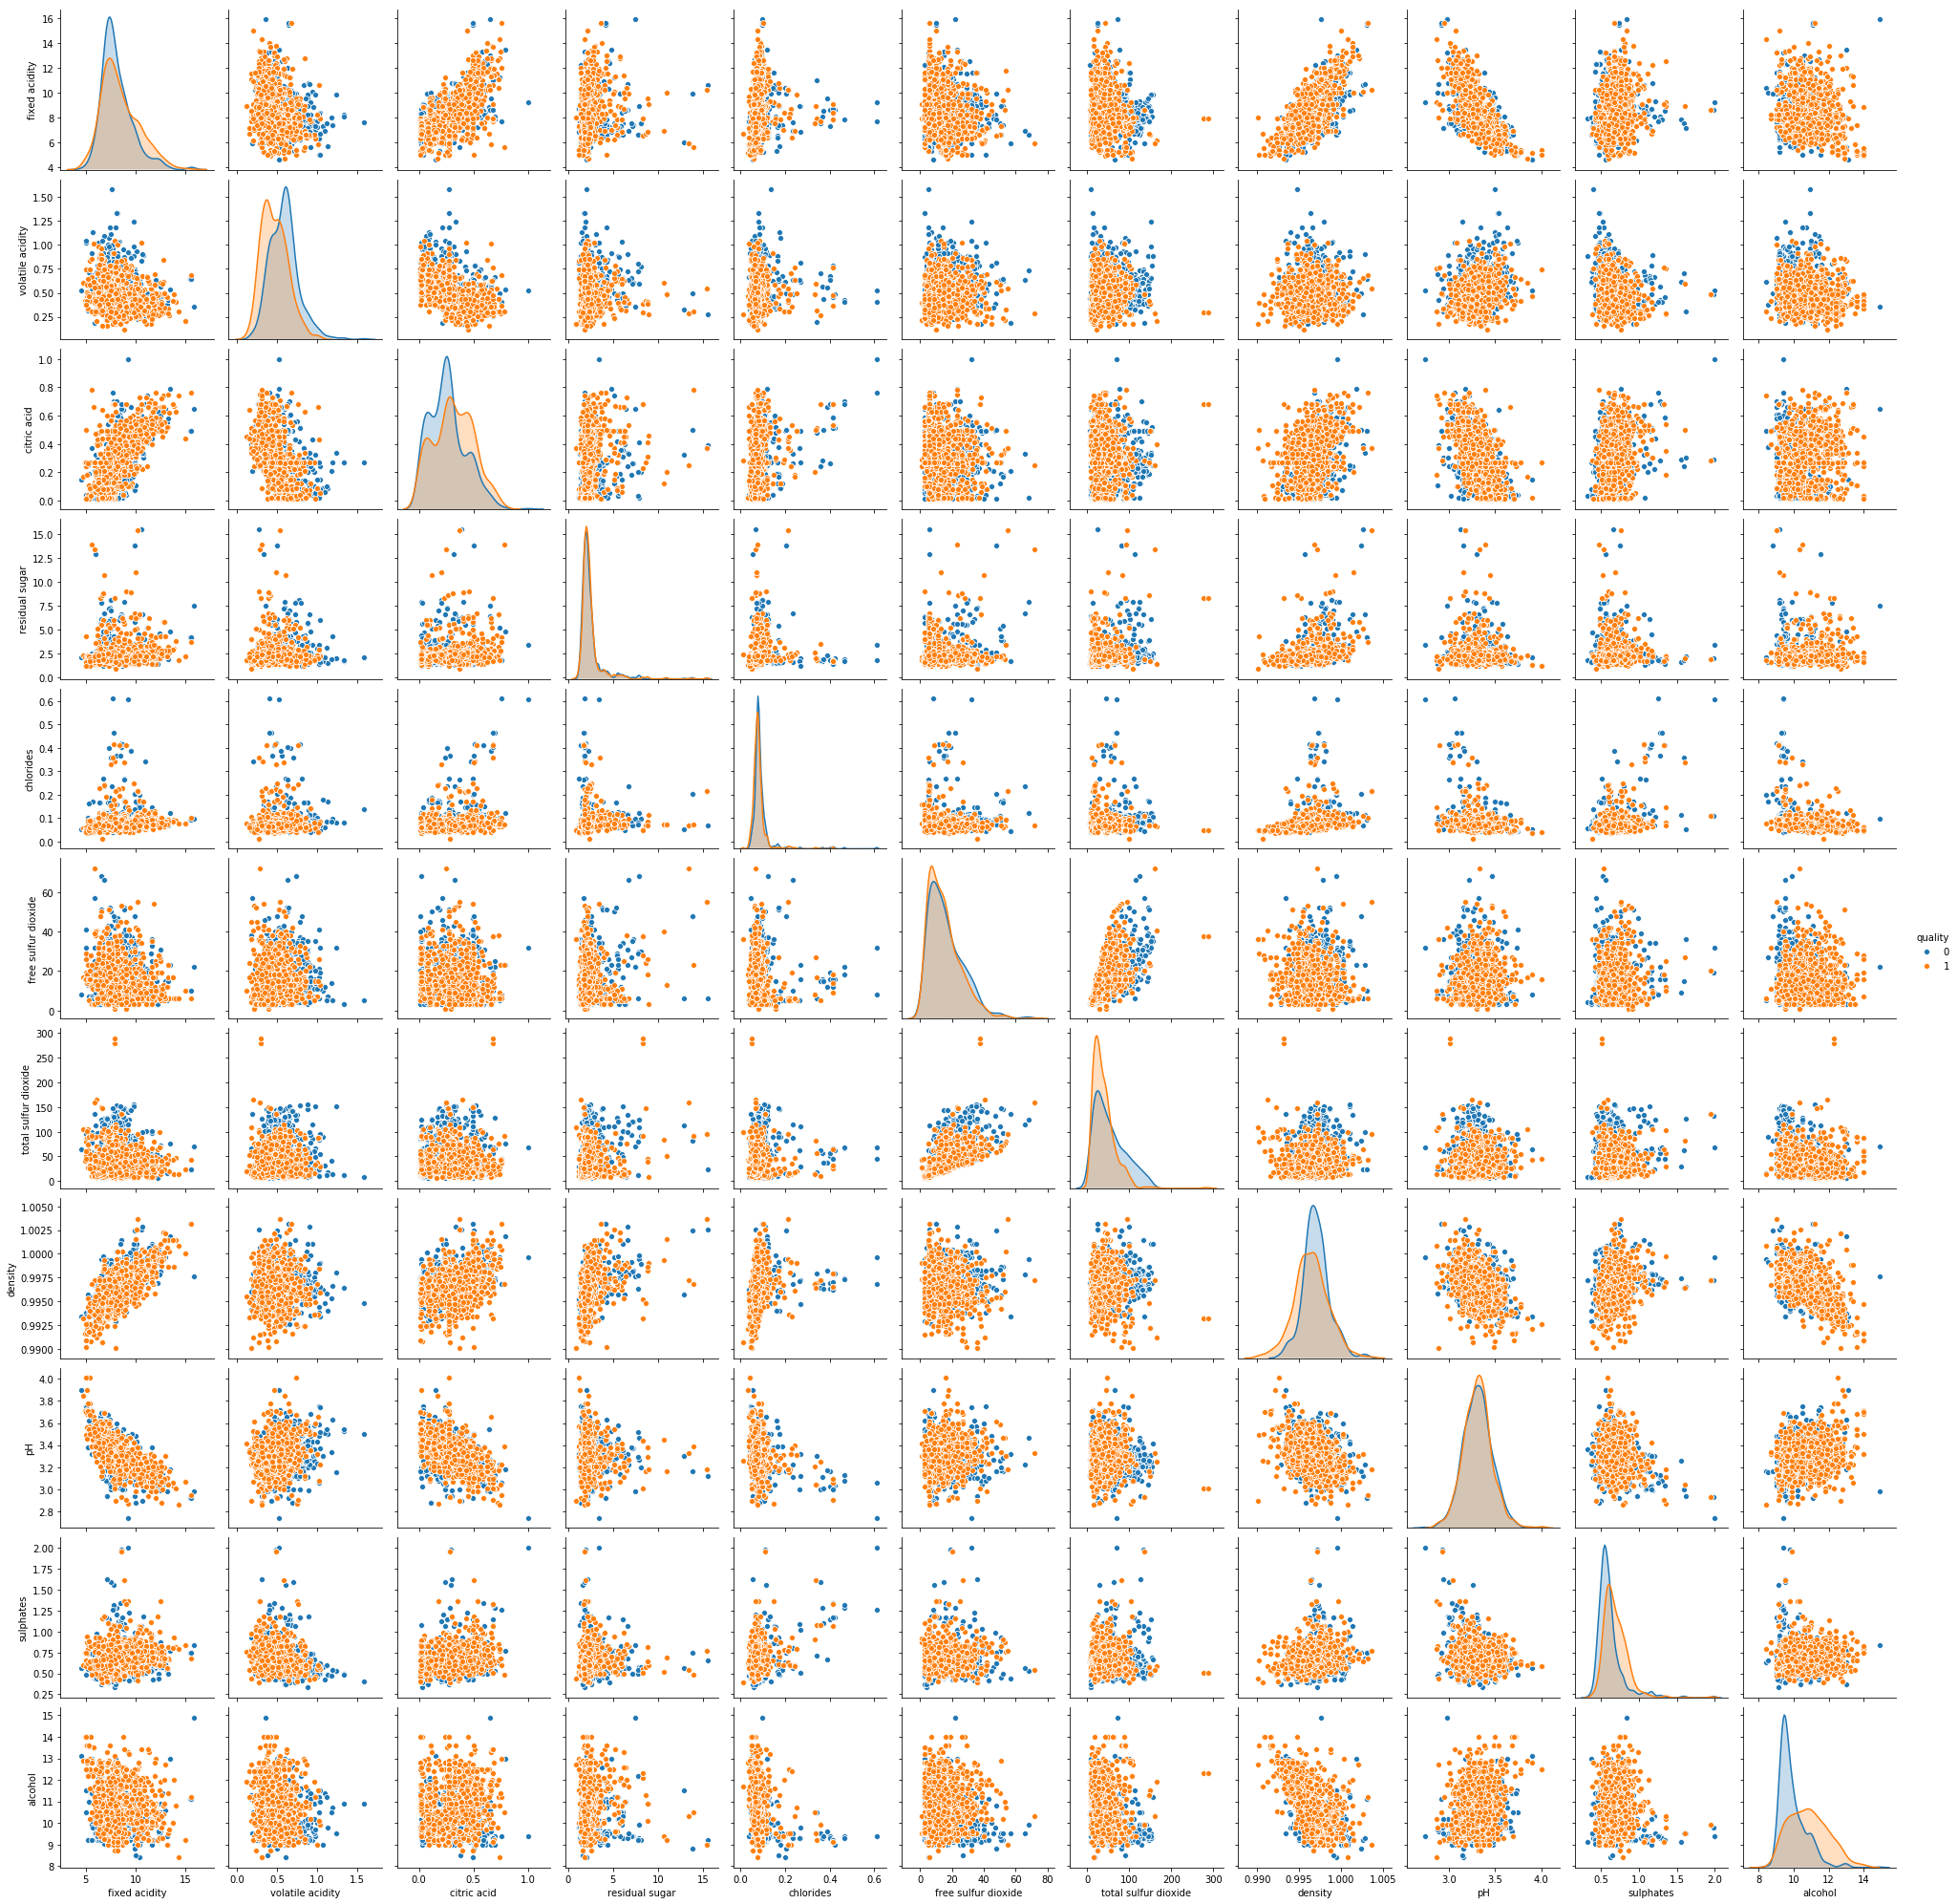

In [14]:
sns.pairplot(data,hue='quality')

# CORRELATION MATRIX

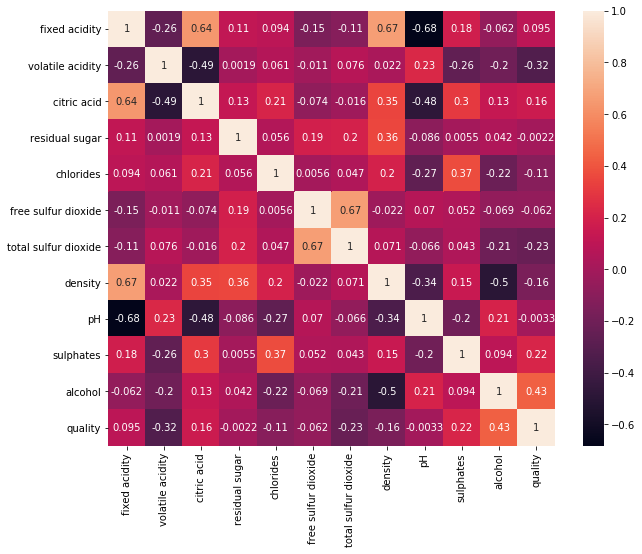

In [15]:
plt.figure(figsize=(10,8))
df_cor=data.corr()
sns.heatmap(df_cor,annot =True)

# Checking for the skewness

In [16]:
data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.338008
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                -0.139303
dtype: float64

Removing skewness using log tranformation

In [17]:
for col in data.columns[:-1]:
    if data.skew().loc[col]>0.55 or data.skew().loc[col]<-0.55:
        data[col]=np.log1p(data[col])

In [18]:
data.skew()

fixed acidity           0.455743
volatile acidity        0.270168
citric acid             0.338008
residual sugar          2.255076
chlorides               5.071476
free sulfur dioxide    -0.097399
total sulfur dioxide   -0.035746
density                 0.071288
pH                      0.193683
sulphates               1.610497
alcohol                 0.677798
quality                -0.139303
dtype: float64

# Handling the Outliers

Performing the zscore analysis

In [19]:
from  scipy.stats import zscore
zs=np.abs(zscore(data))
zs

array([[0.49206951, 0.98751431, 0.12631512, ..., 0.60176716, 0.99166574,
        1.07200445],
       [0.23078609, 1.86351245, 0.12631512, ..., 0.18912335, 0.57421133,
        1.07200445],
       [0.23078609, 1.28941633, 1.43057996, ..., 0.00317263, 0.57421133,
        1.07200445],
       ...,
       [1.28039794, 0.04406793, 0.92237117, ..., 0.6247813 , 0.59120544,
        0.93283195],
       [1.59690876, 0.70125933, 0.97883881, ..., 0.37801568, 0.1719405 ,
        1.07200445],
       [1.51609325, 1.28074974, 0.99752871, ..., 0.06131178, 0.59120544,
        0.93283195]])

In [21]:
df=data[(zs<3).all(axis=1)]
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.128232,0.530628,0.270976,1.064711,0.073250,2.484907,3.555348,0.9978,3.51,0.444686,2.341806,0
1,2.174752,0.631272,0.270976,1.280934,0.093490,3.258097,4.219508,0.9968,3.20,0.518794,2.379546,0
2,2.174752,0.565314,0.040000,1.193922,0.088011,2.772589,4.007333,0.9970,3.26,0.500775,2.379546,0
3,2.501436,0.246860,0.560000,1.064711,0.072321,2.890372,4.110874,0.9980,3.16,0.457425,2.379546,1
4,2.128232,0.530628,0.270976,1.064711,0.073250,2.484907,3.555348,0.9978,3.51,0.444686,2.341806,0


In [22]:
print('shape of the data with outliers  ' ,data.shape)
print('shape of the data without  outliers  ' ,df.shape)

shape of the data with outliers   (1599, 12)
shape of the data without  outliers   (1487, 12)


# Removal of the outliers

In [23]:
from pandas.api.types import is_numeric_dtype
def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    for name in list(df.columns[:-1]):
        #print(name)
        if is_numeric_dtype(df[name]):
            df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
    return df

df1=remove_outlier(df)
df1.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.128232,0.530628,0.270976,1.064711,0.073250,2.484907,3.555348,0.9978,3.51,0.444686,2.341806,0
2,2.174752,0.565314,0.040000,1.193922,0.088011,2.772589,4.007333,0.9970,3.26,0.500775,2.379546,0
3,2.501436,0.246860,0.560000,1.064711,0.072321,2.890372,4.110874,0.9980,3.16,0.457425,2.379546,1
4,2.128232,0.530628,0.270976,1.064711,0.073250,2.484907,3.555348,0.9978,3.51,0.444686,2.341806,0
5,2.128232,0.506818,0.270976,1.029619,0.072321,2.639057,3.713572,0.9978,3.51,0.444686,2.341806,0


*******box plots before outliers removal*******


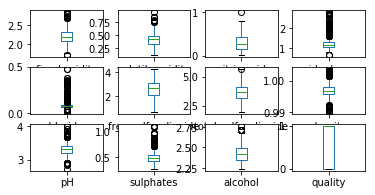

*******box plots after outliers removal*******


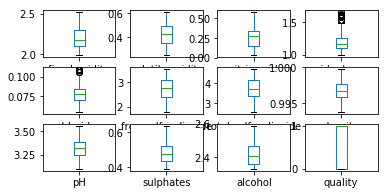

In [24]:
print('*******box plots before outliers removal*******')
data.plot(kind='box',subplots=True , layout=(4,4))
plt.show()
print('*******box plots after outliers removal*******')
df1.plot(kind='box',subplots=True , layout=(4,4))
plt.show()

In [25]:
x=df1.iloc[:,:-1]

In [26]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [27]:
y=df1.iloc[:,-1]


# Analysing various classification algorithm for the best modelling

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

Building a function to find the maximum accuracy corresponding to the random state

In [29]:
def accur_at_rstate(model,x,y):
    random_state=np.arange(42,101)
    accuracy=0
    for r_state in random_state:
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=r_state)
        #DT=DecisionTreeClassifier()
        model.fit(train_x,train_y)
        pred = model.predict(test_x)
        #print('The accuracy for the {} is {}'.format(r_state,accuracy_score(test_y,pred_DT)))
        if accuracy_score(test_y,pred) > accuracy:
            accuracy=accuracy_score(test_y,pred)
            Final_r_state=r_state
        #Calculating 
    print('The maximum accuracy reached is {} at random state {}' .format(accuracy,Final_r_state))
    return Final_r_state
    

Building a function to find the AUC Score and Confusion matrix

In [58]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
def roc_curve(model,r_state):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=r_state)
    fpr_tr,tpr_tr,threshold = metrics.roc_curve(train_y,model.predict_proba(train_x)[:,1])
    fpr_test,tpr_test,threshold = metrics.roc_curve(test_y,model.predict_proba(test_x)[:,1])
    plt.plot(fpr_tr,tpr_tr ,label="train AUC ="+str(metrics.auc(fpr_tr,tpr_tr)))
    plt.plot(fpr_test,tpr_test ,label="test AUC ="+str(metrics.auc(fpr_test,tpr_test)))
    plt.title('ROC curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    plt.show()
    pred=model.predict(test_x)
    sns.heatmap(confusion_matrix(test_y,pred),annot=True)

# Performing DecisionTreeClassifier

In [31]:
from sklearn.model_selection import GridSearchCV
#max_depth = np.arange(30)
depth={'max_depth':range(0,30)}
DT=DecisionTreeClassifier()
gs=GridSearchCV(DT,depth,cv=10)
gs.fit(x,y)
gs.best_params_

{'max_depth': 26}

The maximum accuracy reached is 0.76875 at random state 56
Cross_val_score  0.5912361135602187
Train_x shape (371, 11)
Test_x shape (160, 11)
Train_y shape (371,)
Test_y shape (160,)


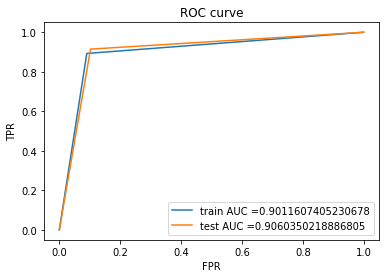

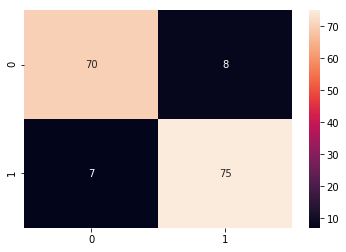

In [32]:
DT=DecisionTreeClassifier(max_depth=26)
Final_Random_state=accur_at_rstate(DT,x,y)
from sklearn.model_selection import cross_val_score
print('Cross_val_score ',cross_val_score(DT,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(DT,Final_Random_state)

# Performing KNeighborsClassifier

In [33]:
neighbour={'n_neighbors':range(1,30)}
Knn=KNeighborsClassifier()
gs=GridSearchCV(Knn,neighbour,cv=10)
gs.fit(x,y)
gs.best_params_

{'n_neighbors': 5}

The maximum accuracy reached is 0.75 at random state 98
Cross_val_score  0.6329747839887145
Train_x shape (371, 11)
Test_x shape (160, 11)
Train_y shape (371,)
Test_y shape (160,)


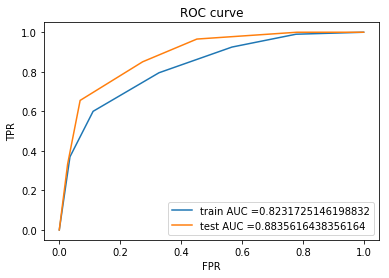

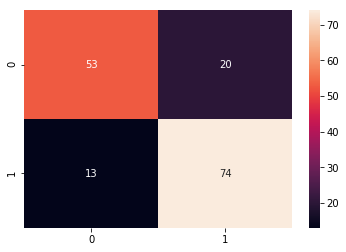

In [34]:
Knn=KNeighborsClassifier(n_neighbors=5)
Final_Random_state=accur_at_rstate(Knn,x,y)
print('Cross_val_score ',cross_val_score(Knn,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(Knn,Final_Random_state)

# Performing Support Vector Machine for classification

In [35]:
gamma={'gamma':range(1,30),'kernel':['Poly','rbf']}
svc=SVC()
gs=GridSearchCV(svc,gamma,cv=10)
gs.fit(x,y)
gs.best_params_

{'gamma': 1, 'kernel': 'rbf'}

In [37]:
svc=SVC(gamma=1,kernel='rbf')
Final_Random_state=accur_at_rstate(svc,x,y)
print('Cross_val_score ',cross_val_score(svc,x,y,cv=5 ,scoring='accuracy').mean())
#roc_curve(svc,Final_Random_state)

The maximum accuracy reached is 0.85 at random state 87
Cross_val_score  0.5743431493563745


# Performing Bernoulli Naive bayes

In [38]:
from sklearn.naive_bayes import BernoulliNB
alpha={'alpha':range(1,30)}
NB=BernoulliNB()
gs=GridSearchCV(NB,alpha,cv=10)
gs.fit(x,y)
gs.best_params_

{'alpha': 1}

The maximum accuracy reached is 0.78125 at random state 86
Cross_val_score  0.7082172456356904
Train_x shape (371, 11)
Test_x shape (160, 11)
Train_y shape (371,)
Test_y shape (160,)


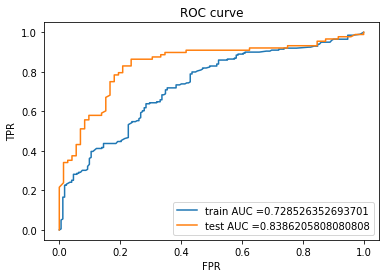

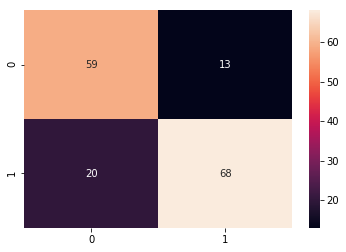

In [39]:
NB=BernoulliNB(alpha=21)
Final_Random_state=accur_at_rstate(NB,x,y)
print('Cross_val_score ',cross_val_score(NB,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(NB,Final_Random_state)

# Performing Logistic Regression

In [40]:
C={'C':range(1,30)}
log=LogisticRegression()
gs=GridSearchCV(log,C,cv=10)
gs.fit(x,y)
gs.best_params_

{'C': 6}

The maximum accuracy reached is 0.7875 at random state 87
Cross_val_score  0.7062951860342092
Train_x shape (371, 11)
Test_x shape (160, 11)
Train_y shape (371,)
Test_y shape (160,)


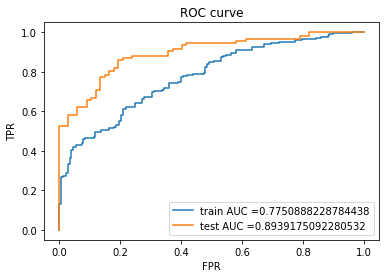

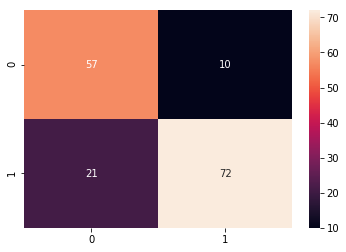

In [41]:
log=LogisticRegression(C=6)
Final_Random_state=accur_at_rstate(log,x,y)
print('Cross_val_score ',cross_val_score(log,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(log,Final_Random_state)

# Performing RandomForestClassifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
parameters={'n_estimators':range(1,30),'max_depth':range(1,30)}
RF=RandomForestClassifier()
gs=GridSearchCV(RF,parameters,cv=10)
gs.fit(x,y)
gs.best_params_

{'max_depth': 4, 'n_estimators': 13}

The maximum accuracy reached is 0.7625 at random state 43
Cross_val_score  0.6742373479104214
Train_x shape (371, 11)
Test_x shape (160, 11)
Train_y shape (371,)
Test_y shape (160,)


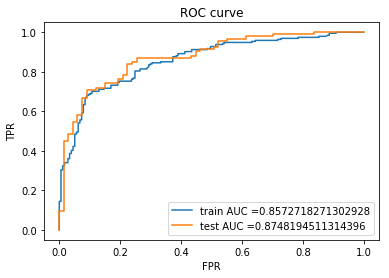

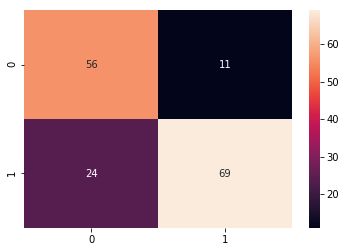

In [43]:
RF=RandomForestClassifier(n_estimators=13,max_depth=4)
Final_Random_state=accur_at_rstate(RF,x,y)
print('Cross_val_score ',cross_val_score(RF,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(RF,Final_Random_state)

# Performing Bagging to increase the accuracy

In [44]:
from sklearn.ensemble import BaggingClassifier
parameters={'n_estimators':range(1,30),'base_estimator':[log,NB,svc,Knn,DT]}
RF=BaggingClassifier()
gs=GridSearchCV(RF,parameters,cv=10)
gs.fit(x,y)
gs.best_params_

{'base_estimator': LogisticRegression(C=6, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False), 'n_estimators': 28}

The maximum accuracy reached is 0.7875 at random state 87
Cross_val_score  0.7006700758243696
Train_x shape (371, 11)
Test_x shape (160, 11)
Train_y shape (371,)
Test_y shape (160,)


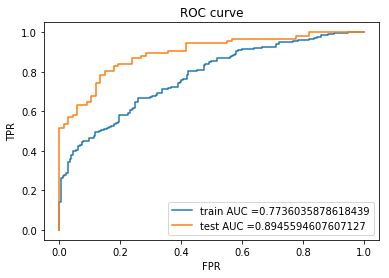

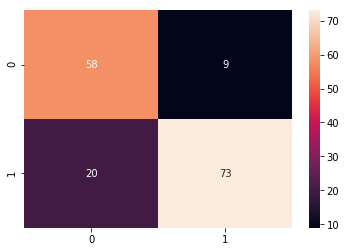

In [56]:
BG=BaggingClassifier(n_estimators=28,base_estimator=log)
Final_Random_state=accur_at_rstate(BG,x,y)
print('Cross_val_score ',cross_val_score(BG,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(BG,Final_Random_state)

# Final Model

SelectingLogistic regression as the final model based on its best performance among all the models performed above

Accuracy 0.7875
--------------------------------------
Confusion matrix with Auc score


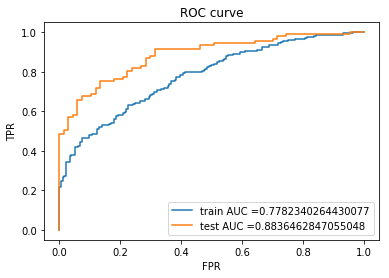

-----------------Confusion Matrix---------------------


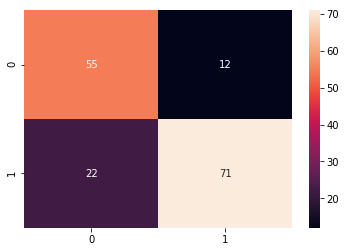

In [59]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=87)
log=LogisticRegression(C=6)
log.fit(train_x,train_y)
pred = log.predict(test_x)
print('Accuracy',accuracy_score(test_y,pred))
print('--------------------------------------')
print('Confusion matrix with Auc score')
roc_curve(log,87)
print('-----------------Confusion Matrix---------------------')


In [75]:
print('classification Report \n',classification_report(test_y,pred))

classification Report 
               precision    recall  f1-score   support

           0       0.71      0.82      0.76        67
           1       0.86      0.76      0.81        93

    accuracy                           0.79       160
   macro avg       0.78      0.79      0.79       160
weighted avg       0.80      0.79      0.79       160



Extracting the features in sorted manner that are contributing to predicted value 

In [70]:
#Features contributing to the quality in a sorted way from highest to lowest.
weight=log.coef_[0, :].argsort()
weight_sorted=weight[ : : 1]
print(np.take(df.columns, weight_sorted[:]))


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


# Saving The model

In [72]:
from sklearn.externals import joblib
joblib.dump(log,"log_red_wine.pkl")

['log_red_wine.pkl']